In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r"C:\Users\HONEY\Downloads\Drug_Data.csv")

In [16]:
df.head()

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction,Information
0,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994 Reviews,2.52,3.01,1.84,\r\n\t\t\t\t\tLevofloxacin is used to treat a ...
1,Acute Bacterial Sinusitis,Moxifloxacin,On Label,RX,755 Reviews,2.78,3.00,2.08,\r\n\t\t\t\t\t This is a generic drug. The ave...
2,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584 Reviews,3.21,4.01,2.57,\r\n\t\t\t\t\tAzithromycin is an antibiotic (m...
3,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,On Label,RX,437 Reviews,3.26,3.23,2.42,\r\n\t\t\t\t\tAmoxicillin/clavulanic acid is a...
4,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,361 Reviews,2.44,2.96,1.68,\r\n\t\t\t\t\tLevofloxacin is used to treat a ...


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100526 entries, 0 to 100525
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Condition     100526 non-null  object 
 1   Drug          100526 non-null  object 
 2   Indication    100526 non-null  object 
 3   Type          100526 non-null  object 
 4   Reviews       100526 non-null  object 
 5   Effective     100526 non-null  float64
 6   EaseOfUse     100526 non-null  float64
 7   Satisfaction  100526 non-null  float64
 8   Information   100526 non-null  object 
dtypes: float64(3), object(6)
memory usage: 6.9+ MB


In [18]:
df.describe()

,Effective,EaseOfUse,Satisfaction
count,100526.000000,100526.000000,100526.000000
mean,3.537109,3.935037,3.178326
std,1.122137,1.048564,1.225872
min,0.950007,0.950036,0.950006
25%,2.990223,3.511813,2.365056
50%,3.700000,4.086120,3.100553
75%,4.328519,4.818468,4.024897
max,5.049998,5.049992,5.049994


Condition       0
Drug            0
Indication      0
Type            0
Reviews         0
Effective       0
EaseOfUse       0
Satisfaction    0
Information     0
dtype: int64


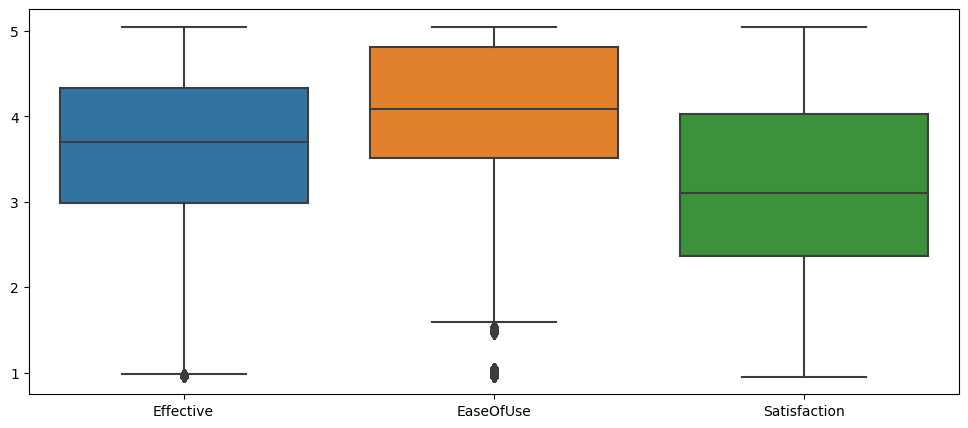

In [19]:
print(df.isnull().sum())
plt.figure(figsize=(12, 5))
sns.boxplot(data=df[['Effective', 'EaseOfUse', 'Satisfaction']])
plt.show()

In [20]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Condition'] = encoder.fit_transform(df['Condition'])
df['Drug'] = encoder.fit_transform(df['Drug'])
df['Indication'] = encoder.fit_transform(df['Indication'])
df = pd.get_dummies(df, columns=['Type'], drop_first=True)


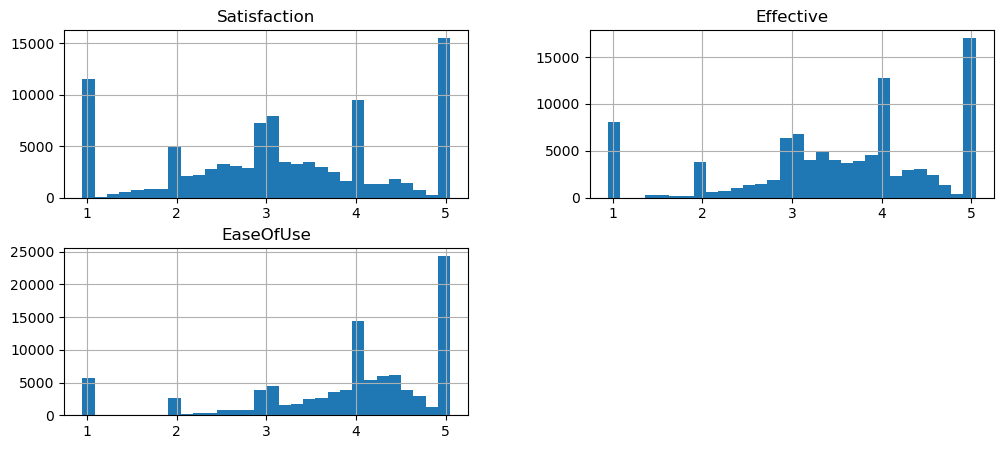

In [33]:
df[['Satisfaction', 'Effective', 'EaseOfUse']].hist(bins=30, figsize=(12, 5))
plt.show()

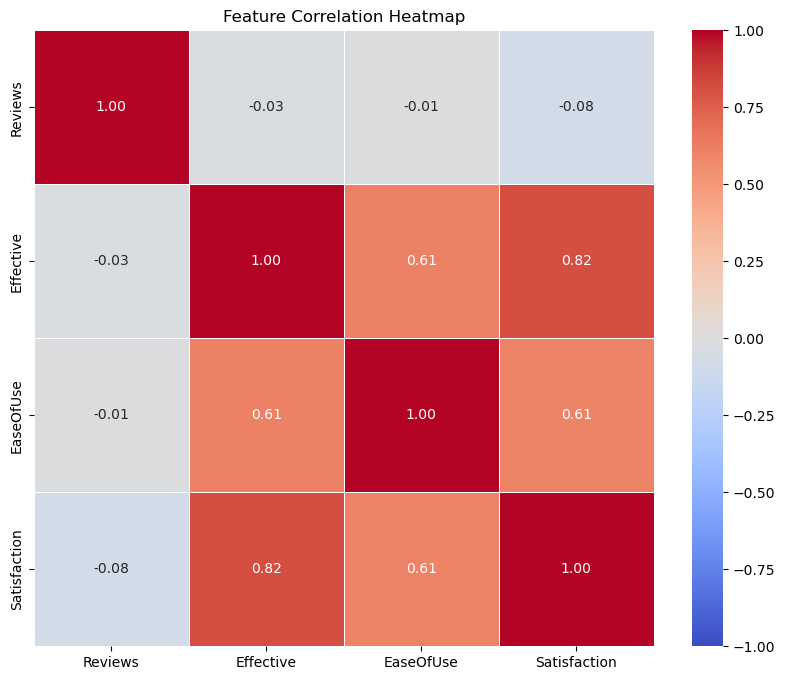

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df["Reviews"] = df["Reviews"].str.extract(r"(\d+)").astype(float)
numeric_df = df.select_dtypes(include=["number"])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))  # Increase figure size if necessary
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


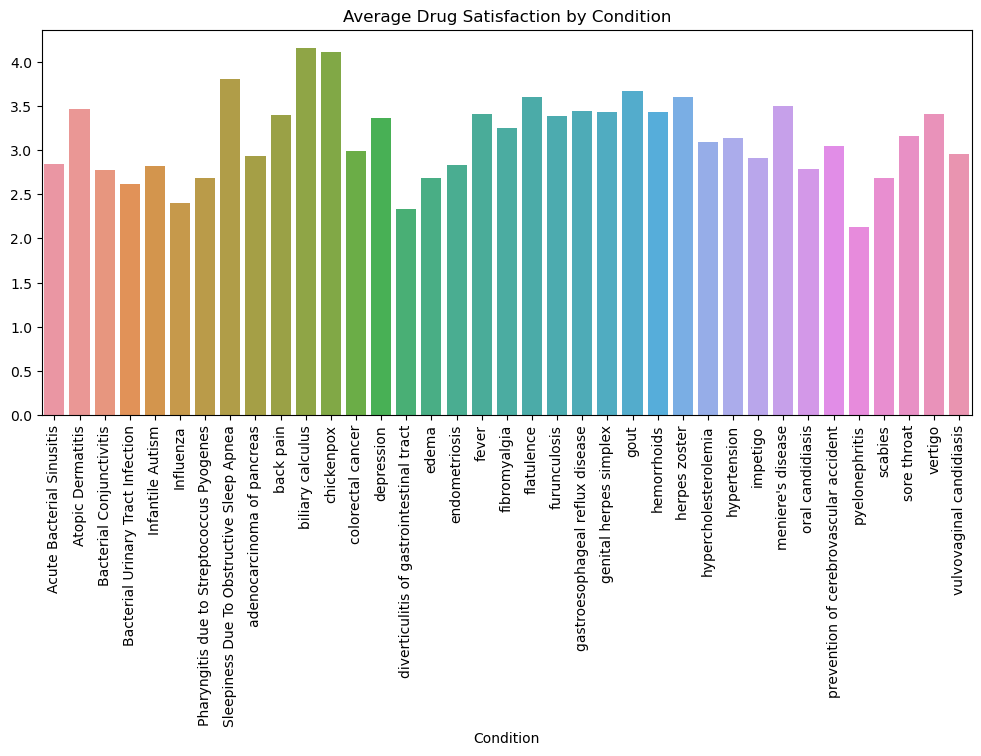

In [27]:
plt.figure(figsize=(12, 5))
sns.barplot(x=df.groupby('Condition')['Satisfaction'].mean().index, 
            y=df.groupby('Condition')['Satisfaction'].mean().values)
plt.xticks(rotation=90)
plt.title("Average Drug Satisfaction by Condition")
plt.show()


) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


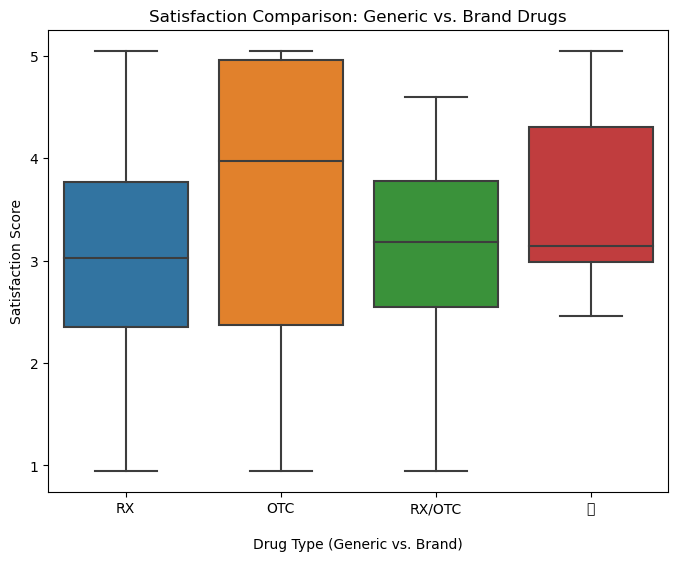

In [32]:
df["Type"] = df["Type"].astype(str)
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["Type"], y=df["Satisfaction"])
plt.title("Satisfaction Comparison: Generic vs. Brand Drugs")
plt.xlabel("Drug Type (Generic vs. Brand)")
plt.ylabel("Satisfaction Score")
plt.show()
